In [1]:
import numpy as np, analysis as ana, prjlib, basic
from matplotlib.pyplot import *

In [2]:
# baseline
p0, __ = prjlib.filename_init(PSA='s14&15_deep56',stype='lcmb',doreal='True',dearot='True',rlmin='200')
ocl0 = (np.loadtxt(p0.quad.f['EB'].ocls)).T[1]
scl0 = np.array([np.loadtxt(p0.quad.f['EB'].cl[i],unpack=True)[1] for i in range(1,201)])

300 2048 -1.9 0.62 5.9 0.8
200 1948 1.6 0.72 11.6 0.315
200 2148 -4.9 0.18 9.7 0.56


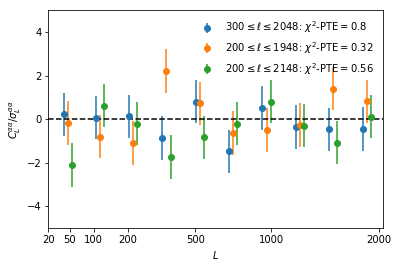

In [3]:
Lmin = 20
mb, mb0, mb1 = prjlib.binning_all(10,lmin=Lmin,Lsp=2048)
xlim(np.sqrt(Lmin),np.sqrt(2048))
ylim(-5,5)
xs = np.array([20,50,100,200,500,1000,2000])
xticks(np.sqrt(xs),xs)
xlabel('$L$')
ylabel(r'$C_L^{\alpha\alpha}/\sigma_L^{\alpha\alpha}$')
for i, (rlmin, rlmax) in enumerate([('300','2048'),('200','1948'),('200','2148')]):
    p1, __ = prjlib.filename_init(PSA='s14&15_deep56',stype='lcmb',doreal='True',dearot='True',rlmin=rlmin,rlmax=rlmax)
    ocl1 = (np.loadtxt(p1.quad.f['EB'].ocls)).T[1]
    scl1 = np.array([np.loadtxt(p1.quad.f['EB'].cl[i],unpack=True)[1] for i in range(1,201)])
    docb = prjlib.binning(ocl1-ocl0,mb0,mb1)
    dscb = prjlib.binning(scl1-scl0,mb0,mb1)
    dmcl = np.mean(dscb,axis=0)
    dvcl = np.std(dscb,axis=0)
    st = ana.statistics(docb,dscb)
    ana.statistics.x1PTE(st)
    ana.statistics.x2PTE(st)
    print(rlmin,rlmax,np.around(st.ox1,decimals=1), np.around(st.px1,decimals=3), np.around(st.ox2,decimals=1), np.around(st.px2,decimals=3))
    Label = r'$'+str(rlmin)+'\leq \ell\leq'+str(rlmax)+'$: $\chi^2$-PTE$='+str(np.around(st.px2,decimals=2))+'$'
    errorbar(np.sqrt(mb.bc)+0.5*(i-1),(docb-dmcl)/dvcl,yerr=dvcl/dvcl,fmt='o',label=Label)

axhline(0,ls='--',color='k')
legend(loc=0,frameon=False)
savefig('fig_specjack.png')